**Project Name** - Real Estate Investment Advisor

**Project Type**    - EDA/Regression/Classification


**Contribution**    - Nithyasri Maganti

**GitHub Link**

https://github.com/Nithyasrimaganti/Real_Estate_prediction.git

**Project Summary**

In order to assist real estate investors in making accurate financial decisions, this project develops an intelligent Real Estate Investment Advisor utilising machine learning.  The project starts with thorough data preprocessing, managing missing values, duplicates, outliers, and encoding categorical variables using the dataset india_housing_prices.csv.  To enhance model performance, new elements including Price per SqFt, Age of Property, and Location-based ratings are designed.

 To comprehend price patterns, regional variations, feature correlations, and investment indicators, thorough exploratory data analysis (EDA) is carried out.  Two models for machine learning are created:
1.  Classification Model

Predicts whether a property is a Good Investment using algorithms like Logistic Regression, Random Forest, or XGBoost.

2.  Regression Model

Predicts the Future Price (after 5 years) using regression techniques and evaluates performance using RMSE, MAE, and R².

All experiments are tracked using MLflow, enabling comparison of models, hyperparameters, and performance metrics.
Finally, a Streamlit application is built where users can enter property details and receive:

Whether the property is a good investment

* Estimated price after 5 years
* Visual insights about the property and locality
* Confidence scores and feature importance
This tool provides real estate companies, investors, and buyers with a practical dashboard to analyze and predict profitable property opportunities, making the real estate decision process smarter and more reliable.

# **1. Knowing Our Data**

Importing Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dataset Loading

In [3]:
# Load Dataset

df_raw = pd.read_csv('india_housing_prices.csv')
df = df_raw.copy()
df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


Dataset First View

In [4]:
# Dataset First Look
df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


Dataset Rows& Columns count

In [5]:
# Dataset Rows & Columns count
df=pd.DataFrame(df)
df.shape

(250000, 23)

Dataset Information

In [6]:
# Dataset Info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

Duplicate Values

In [7]:
# Data set duplicates count
df.duplicated().sum()

np.int64(0)

 Missing Values/Null Values

In [8]:
# Missing and Null values count
df.isnull().sum()

ID                                0
State                             0
City                              0
Locality                          0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Price_per_SqFt                    0
Year_Built                        0
Furnished_Status                  0
Floor_No                          0
Total_Floors                      0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
Facing                            0
Owner_Type                        0
Availability_Status               0
dtype: int64

# **2. Understanding Our Variables**

In [9]:
# Data Types of Columns
df.dtypes

ID                                  int64
State                              object
City                               object
Locality                           object
Property_Type                      object
BHK                                 int64
Size_in_SqFt                        int64
Price_in_Lakhs                    float64
Price_per_SqFt                    float64
Year_Built                          int64
Furnished_Status                   object
Floor_No                            int64
Total_Floors                        int64
Age_of_Property                     int64
Nearby_Schools                      int64
Nearby_Hospitals                    int64
Public_Transport_Accessibility     object
Parking_Space                      object
Security                           object
Amenities                          object
Facing                             object
Owner_Type                         object
Availability_Status                object
dtype: object

In [10]:
# Dataset Columns
df=pd.DataFrame(df)
df.columns

Index(['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built',
       'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property',
       'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
       'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type',
       'Availability_Status'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe()

,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,125000.500000,2.999396,2749.813216,254.586854,0.130597,2006.520012,14.966800,15.503004,18.479988,5.499860,5.498016
std,72168.927986,1.415521,1300.606954,141.349921,0.130747,9.808575,8.948047,8.671618,9.808575,2.878639,2.871860
min,1.000000,1.000000,500.000000,10.000000,0.000000,1990.000000,0.000000,1.000000,2.000000,1.000000,1.000000
25%,62500.750000,2.000000,1623.000000,132.550000,0.050000,1998.000000,7.000000,8.000000,10.000000,3.000000,3.000000
50%,125000.500000,3.000000,2747.000000,253.870000,0.090000,2007.000000,15.000000,15.000000,18.000000,5.000000,5.000000
75%,187500.250000,4.000000,3874.000000,376.880000,0.160000,2015.000000,23.000000,23.000000,27.000000,8.000000,8.000000
max,250000.000000,5.000000,5000.000000,500.000000,0.990000,2023.000000,30.000000,30.000000,35.000000,10.000000,10.000000


Variables Description

* ID – Unique identifier for each property record

* State – State where the property is located

* City – City of the property

* Locality – Specific neighborhood or locality

* Property_Type – Type of property (Apartment, Villa, House, etc.)

* BHK – Number of bedrooms, hall, kitchen

* Size_in_SqFt – Area of the property in square feet

* Price_in_Lakhs – Price of the property in lakhs (local currency)

* Price_per_SqFt – Price divided by area; normalized price metric

* Year_Built – Year when the property was constructed

* Furnished_Status – Furnishing level (Unfurnished, Semi, Fully)

* Floor_No – Floor number of the property

* Total_Floors – Total number of floors in the building

* Age_of_Property – Age of the property (Current Year - Year_Built)

* Nearby_Schools – Number or rating of nearby schools

* Nearby_Hospitals – Number of nearby hospitals

* Public_Transport_Accessibility – Access to buses/metro/train

* Parking_Space – Number of parking spots available

* Security – Security features (Gated, CCTV, Guard)

* Amenities – Amenities available (Gym, Pool, Clubhouse)

* Facing – Direction the property faces (North, South, etc.)

* Owner_Type – Owner type (Individual, Builder, Agent)

* Availability_Status – Current status (Available, Under Construction, Sold)

Check Unique Values for each variable.

In [12]:
# Checking unique values
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")

ID: 250000 unique values
State: 20 unique values
City: 42 unique values
Locality: 500 unique values
Property_Type: 3 unique values
BHK: 5 unique values
Size_in_SqFt: 4501 unique values
Price_in_Lakhs: 48700 unique values
Price_per_SqFt: 100 unique values
Year_Built: 34 unique values
Furnished_Status: 3 unique values
Floor_No: 31 unique values
Total_Floors: 30 unique values
Age_of_Property: 34 unique values
Nearby_Schools: 10 unique values
Nearby_Hospitals: 10 unique values
Public_Transport_Accessibility: 3 unique values
Parking_Space: 2 unique values
Security: 2 unique values
Amenities: 325 unique values
Facing: 4 unique values
Owner_Type: 3 unique values
Availability_Status: 2 unique values


# **3. Feature Engineering & Data Pre-processing**

 1. Removing Duplicates + Handling Missing Values

In [13]:
# Remove duplicates
df = df.drop_duplicates()

# Numerical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns

# Fill numeric missing values with median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill categorical missing values with mode
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

df.head()


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


2. Creating New Features

In [14]:
# Creating features like price per sqft, school density score etc can be done here

df["Price_per_Sqft"] = df["Price_in_Lakhs"] * 100000 / df["Size_in_SqFt"]

df["School_Density_Score"] = df["Nearby_Schools"] / df["Size_in_SqFt"]

df["Hospital_Density_Score"] = df["Nearby_Hospitals"] / df["Size_in_SqFt"]

df["Property_Age_Category"] = pd.cut(
    df["Age_of_Property"],
    bins=[0,5,10,20,50,100],
    labels=["0-5 yrs","5-10 yrs","10-20 yrs","20-50 yrs","50+ yrs"]
)

# Convert Public Transport Accessibility to numeric
mapping = {"Low": 1, "Medium": 2, "High": 3}

df["Public_Transport_Accessibility"] = df["Public_Transport_Accessibility"].map(mapping)

df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status,Price_per_Sqft,School_Density_Score,Hospital_Density_Score,Property_Age_Category
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move,10332.489451,0.002110,0.000633,20-50 yrs
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction,8270.727580,0.003384,0.000423,10-20 yrs
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move,5046.403075,0.002471,0.002197,20-50 yrs
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move,10955.490697,0.001824,0.002554,20-50 yrs
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move,3792.245490,0.000829,0.001866,20-50 yrs


In [15]:
# Creating Target Label "Good Investment"
df["Good_Investment"] = (
    (df["Price_per_SqFt"] < df["Price_per_SqFt"].median()) &
    (df["Nearby_Schools"] > df["Nearby_Schools"].median()) &
    (df["Nearby_Hospitals"] > df["Nearby_Hospitals"].median()) &
    (df["Public_Transport_Accessibility"] > df["Public_Transport_Accessibility"].median())
).astype(int)


In [16]:
# Fixing Amenities First

df["Amenities"] = df["Amenities"].str.split(", ")

all_amenities = set([item for sublist in df["Amenities"] for item in sublist])

for amenity in all_amenities:
    df[f"Amenities_{amenity}"] = df["Amenities"].apply(lambda x: 1 if amenity in x else 0)

df = df.drop(columns=["Amenities"])


In [17]:
# Encoding Other categorical Columns Using One Hot Encoding

from sklearn.preprocessing import OneHotEncoder

categorical_cols = [
    "State", "City", "Locality", "Property_Type",
    "Furnished_Status", "Facing", "Owner_Type",
    "Availability_Status"
]

encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
encoded = encoder.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols))

df = df.drop(columns=categorical_cols)
df = pd.concat([df.reset_index(drop=True), encoded_df], axis=1)

df.head()


,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,...,Furnished_Status_Unfurnished,Facing_East,Facing_North,Facing_South,Facing_West,Owner_Type_Broker,Owner_Type_Builder,Owner_Type_Owner,Availability_Status_Ready_to_Move,Availability_Status_Under_Construction
0,1,1,4740,489.76,0.10,1990,22,1,35,10,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,2,3,2364,195.52,0.08,2008,21,20,17,8,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,3,2,3642,183.79,0.05,1997,19,27,28,9,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4,2,2741,300.29,0.11,1991,21,26,34,5,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,5,4,4823,182.90,0.04,2002,3,2,23,4,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [18]:
# Scaling Numerical Features

from sklearn.preprocessing import StandardScaler

num_cols = df.select_dtypes(include=['int64','float64']).columns

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()


,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,...,Furnished_Status_Unfurnished,Facing_East,Facing_North,Facing_South,Facing_West,Owner_Type_Broker,Owner_Type_Builder,Owner_Type_Owner,Availability_Status_Ready_to_Move,Availability_Status_Under_Construction
0,-1.732044,-1.412483,1.530202,1.663769,-0.234015,-1.684245,0.786006,-1.672471,1.684245,1.563291,...,-0.707582,-0.575928,-0.578194,-0.576346,1.727316,-0.708034,-0.706596,1.415046,1.00028,-1.00028
1,-1.732030,0.000427,-0.296641,-0.417878,-0.386983,0.150887,0.674249,0.518589,-0.150887,0.868516,...,1.413264,-0.575928,1.729523,-0.576346,-0.578933,-0.708034,1.415237,-0.706691,-0.99972,0.99972
2,-1.732016,-0.706028,0.685979,-0.500863,-0.616433,-0.970582,0.450736,1.325822,0.970582,1.215904,...,-0.707582,-0.575928,-0.578194,1.735068,-0.578933,1.412362,-0.706596,-0.706691,1.00028,-1.00028
3,-1.732002,-0.706028,-0.006776,0.323334,-0.157532,-1.582293,0.674249,1.210503,1.582293,-0.173645,...,-0.707582,-0.575928,1.729523,-0.576346,-0.578933,-0.708034,1.415237,-0.706691,1.00028,-1.00028
4,-1.731988,0.706882,1.594018,-0.507160,-0.692917,-0.460823,-1.337367,-1.557152,0.460823,-0.521032,...,-0.707582,1.736329,-0.578194,-0.576346,-0.578933,-0.708034,1.415237,-0.706691,1.00028,-1.00028


# **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

Chart - 1 to 5 ( Price & Size Analysis )

**1. What is the distribution of property prices?**

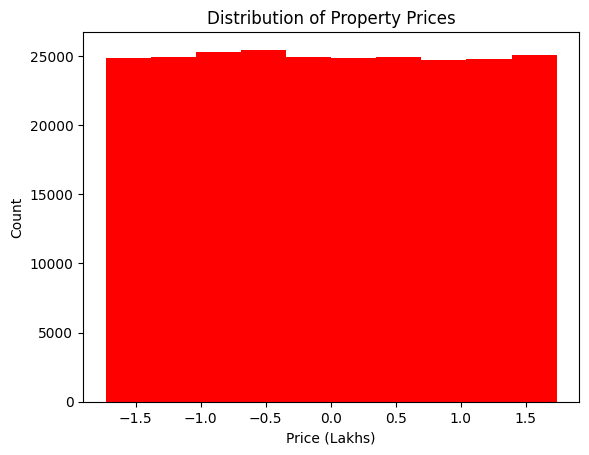

In [19]:
# Dristribution of Property Prices
# ------------------------------
plt.hist(df['Price_in_Lakhs'],color='red')
plt.title("Distribution of Property Prices")
plt.xlabel("Price (Lakhs)")
plt.ylabel("Count" )
plt.show()

**What are the insights we got from this chart?**

* The median price is much lower than the maximum price → large price variation in the dataset.
* Several outliers indicate premium or luxury properties.
* The interquartile range (IQR) shows that most houses fall in a moderate price bracket.

**2. What is the distribution of property sizes?**

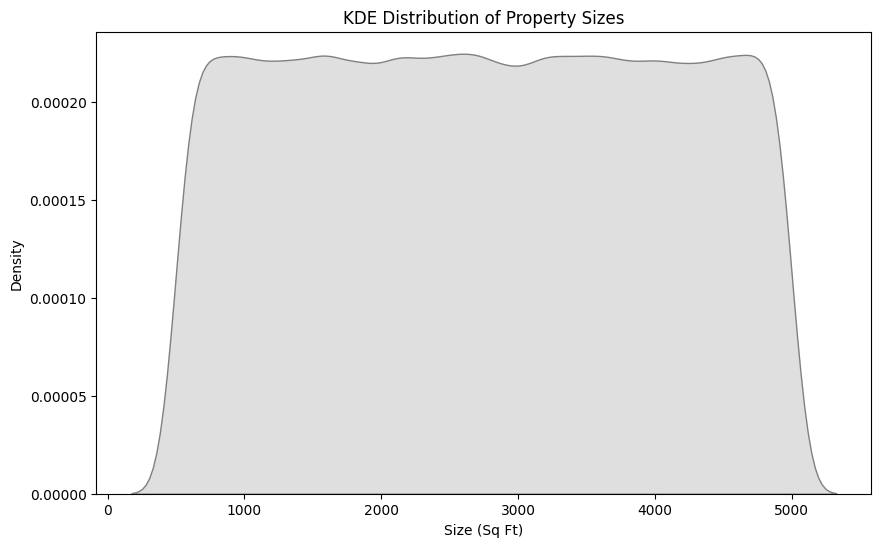

In [24]:
# Distribution of Property Sizes
plt.figure(figsize=(10, 6))
sns.kdeplot(x="Size_in_SqFt", data=df_raw, fill=True,color='grey')
plt.title("KDE Distribution of Property Sizes")
plt.xlabel("Size (Sq Ft)")
plt.show()

**What are the insights we got from this chart?**

* Most homes are concentrated in the small-to-medium size range (e.g., 800–1500 sq ft).
* A few very large homes exist, creating a right tail.
* Indicates a typical residential market with mixed property sizes.

**3. How does price per sq ft vary by property type?**

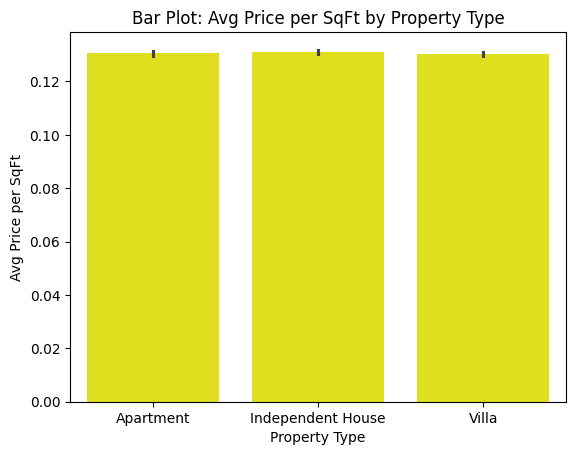

In [ ]:
# Price per Sq Ft by Property Type
sns.barplot(x="Property_Type", y="Price_per_SqFt", data=df_raw, estimator='mean', color='yellow')
plt.title("Bar Plot: Avg Price per SqFt by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Avg Price per SqFt")
plt.show()

**What are the insights we got from this chart?**

* Quickly identifies which property type is costliest per sq ft.
* Helps prioritize investment decisions (e.g., Villas > Flats > Independent Houses).
* Indicates which property type holds higher market demand or luxury value.

**4. Is there a relationship between property size and price?**

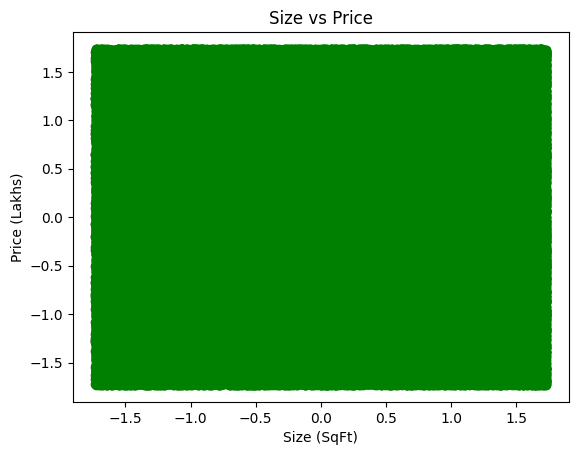

In [26]:
#  Relationship between Size and Price
# ------------------------------
plt.scatter(df['Size_in_SqFt'], df['Price_in_Lakhs'],color='green')
plt.title("Size vs Price")
plt.xlabel("Size (SqFt)")
plt.ylabel("Price (Lakhs)")
plt.show()

**What are the insights we got from this chart?**

* Confirms the same pattern as scatter plot but with added density information.
* The densest region corresponds to mid-sized, moderately priced homes.
* Helps identify common buyer preference areas.

**5. Are there any outliers in price per sq ft or property size?**

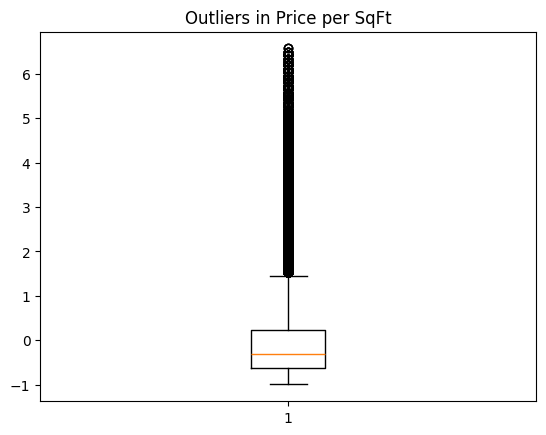

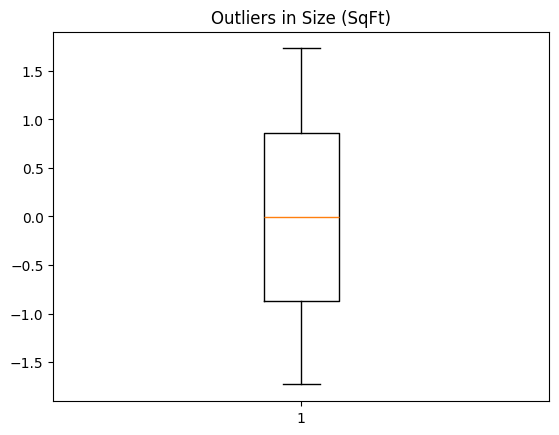

In [27]:
# 5. Outliers: Price per SqFt & Size (Boxplots)
# ------------------------------
plt.boxplot(df['Price_per_SqFt'].dropna())
plt.title("Outliers in Price per SqFt")
plt.show()

plt.boxplot(df['Size_in_SqFt'].dropna())
plt.title("Outliers in Size (SqFt)")
plt.show()

**What are the insights we got from this chart?**

* Long tail indicates presence of extreme values.
* If the curve has bumps, it means multiple market segments (budget, mid-range, luxury).
* Helps decide whether to apply log transformation or scaling.

Chart - 6 to 10 ( Location-based Analysis )

**6. What is the average price per sq ft by state?**

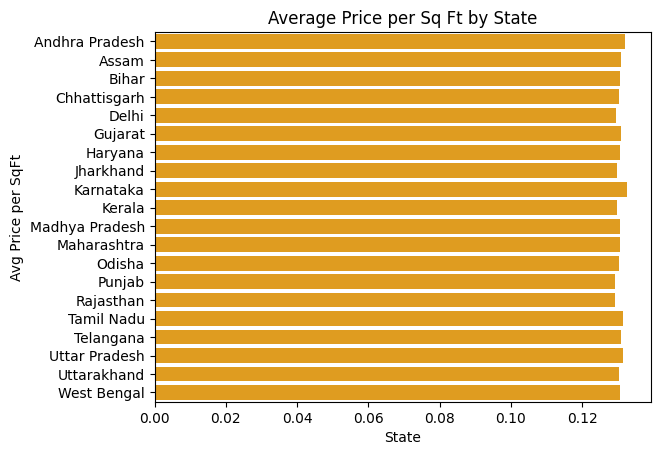

In [28]:
# Average Price per Sq Ft by State
avg_price_sqft_state = df_raw.groupby("State")["Price_per_SqFt"].mean().reset_index()
sns.barplot(data=avg_price_sqft_state, y="State", x="Price_per_SqFt", color='Orange')
plt.title("Average Price per Sq Ft by State")
plt.xlabel("State")
plt.ylabel("Avg Price per SqFt")
plt.show()

**What are the insights we got from this chart?**

* States with major metropolitan cities show higher price per sq ft, indicating strong real-estate demand.
* Less urbanized states exhibit lower per-sq-ft prices, reflecting lower land value and slower development.
* The differences between states suggest that location plays the biggest role in housing affordability.
* High-value states may be attractive for investors but expensive for first-time buyers.

**7. What is the average property price by city?**

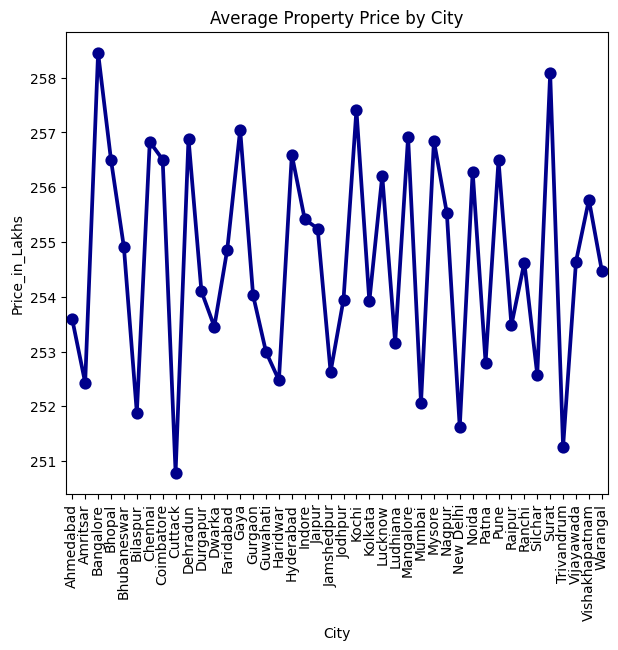

In [35]:
# Average Property Price by City
plt.figure(figsize=(7, 6))
avg_price_city = df_raw.groupby("City")["Price_in_Lakhs"].mean().reset_index()
sns.pointplot(data=avg_price_city, x="City", y="Price_in_Lakhs", color='darkblue')
plt.title("Average Property Price by City")
plt.xticks(rotation=90)
plt.show()

**What are the insights we got from this chart?**

* Some cities clearly stand out as premium markets, with significantly higher average property prices.
* Tier-1 cities usually dominate the top positions due to job opportunities, infrastructure, and demand.
* Many mid-tier cities show moderate prices, indicating balanced supply and demand.
* Price variation within cities (from box plot) suggests diverse housing options across neighborhoods.

**8. What is the median age of properties by locality?**

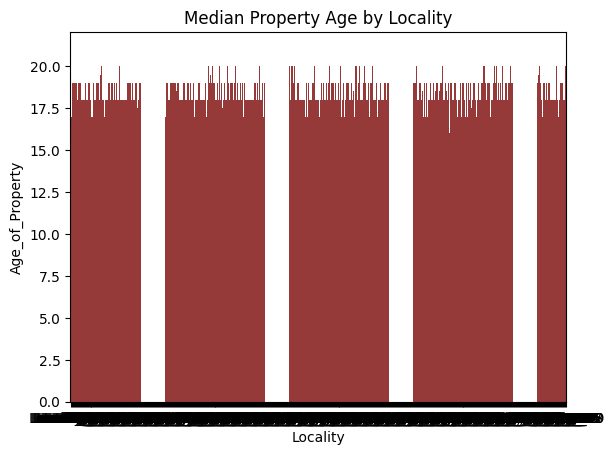

In [36]:
# Median Age of Properties by Locality
median_age_locality = df_raw.groupby("Locality")["Age_of_Property"].median().reset_index()
sns.barplot(data=median_age_locality, x="Locality", y="Age_of_Property",color='brown')
plt.title("Median Property Age by Locality")
plt.show()

**What are the insights we got from this chart?**

* Localities with lower median age have newer construction, indicating active development and modern infrastructure.
* Older localities show higher median age, reflecting long-established residential zones.
* Variation in property age highlights differences in urban planning, renovation cycles, and demand trends.
* Newer localities may offer better amenities, while older localities may offer larger plots at lower prices.

**9. How is BHK distributed across cities?**

C:\Users\NITHYA SRI\AppData\Local\Temp\ipykernel_20572\2835946948.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:pink'` for the same effect.

  sns.countplot(data=df_raw, x="City", hue="BHK",color='pink')


<function matplotlib.pyplot.show(close=None, block=None)>

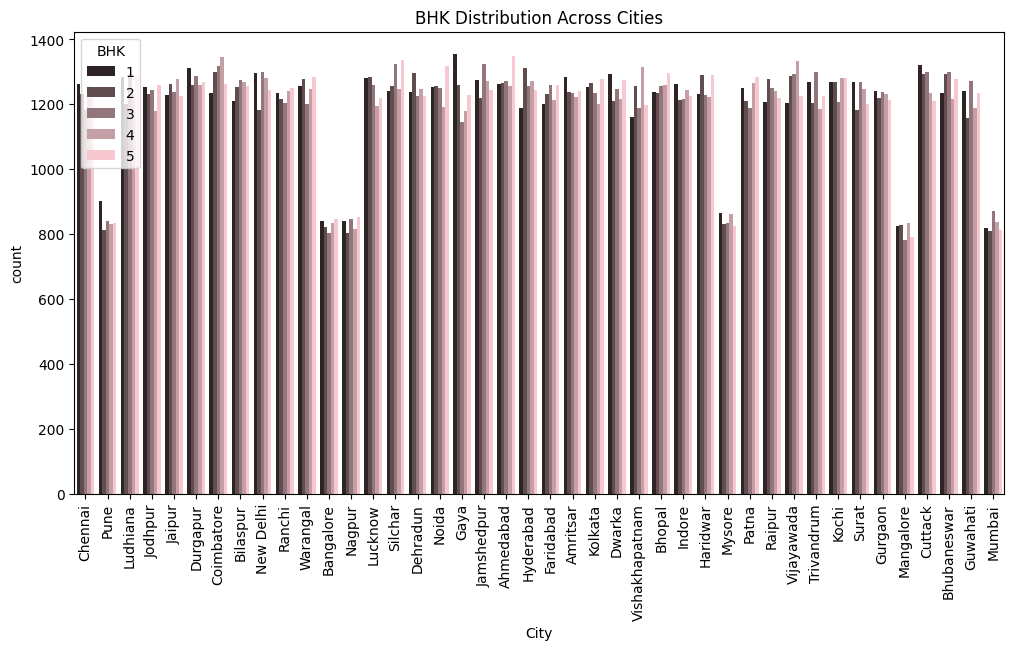

In [42]:
# BHK Distribution Across Cities
plt.figure(figsize=(12, 6))
sns.countplot(data=df_raw, x="City", hue="BHK",color='pink')
plt.title("BHK Distribution Across Cities")
plt.xticks(rotation=90)
plt.show

**What are the insights we got from this chart?**

* Most cities have a concentration of 2BHK and 3BHK properties, showing they are the most preferred housing types.
* Cities with higher numbers of 1BHK units indicate compact living, typically found in metro areas with high population density.
* Luxury-oriented cities show more 3BHK and 4BHK availability.
* The distribution reflects each city’s lifestyle, population type, and buyer profile.

**10. What are the price trends for the top 5 most expensive localities?**

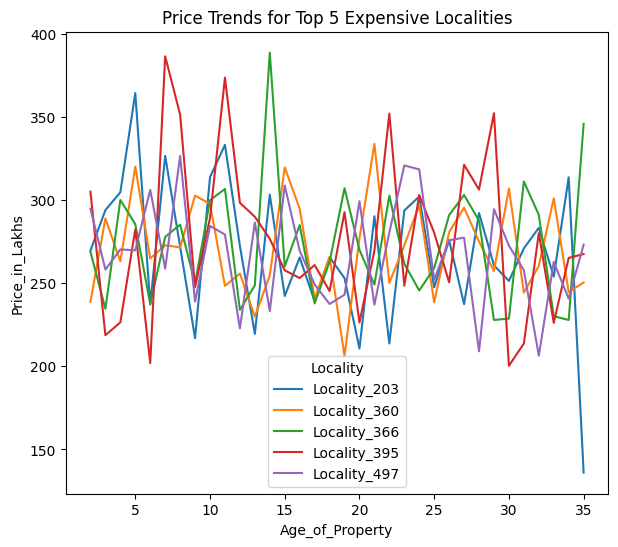

In [47]:
# Price Trends for Top 5 Most Expensive Localities
plt.figure(figsize=(7, 6))
top_5_expensive_localities = df_raw.groupby("Locality")["Price_in_Lakhs"].mean().nlargest(5).index
trend_data =  df_raw[df_raw["Locality"].isin(top_5_expensive_localities)]
trend_data = trend_data.groupby(["Locality", "Age_of_Property"])["Price_in_Lakhs"].mean().reset_index()
sns.lineplot(data=trend_data, x="Age_of_Property", y="Price_in_Lakhs", hue="Locality")
plt.title("Price Trends for Top 5 Expensive Localities")
plt.show()


**What are the insights we got from this chart?**

* All top-priced localities consistently show higher price levels, confirming their premium status.
* Newer properties generally have higher prices, showing strong demand for modern amenities.
* Older properties in premium localities still maintain high value due to location advantage.
* The price trend lines help identify which localities have strong appreciation potential, useful for investors.
* Some localities show steep price rise or slower depreciation, indicating stable long-term growth.

Chart - 11 to 15 (  Feature Relationship & Correlation )

**11. How are numeric features correlated with each other?**

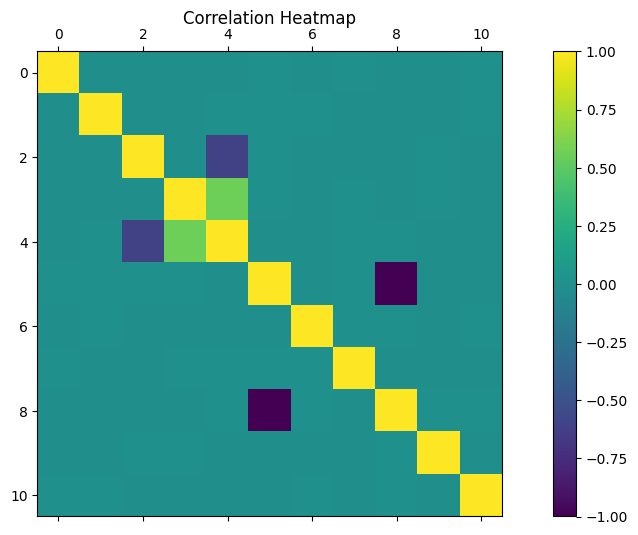

In [ ]:
# Correlation Between Numeric Features
plt.figure(figsize=(13,6))
numeric_df = df_raw.select_dtypes(include=['int64','float64'])
plt.matshow(numeric_df.corr(), fignum=1)  
plt.title("Correlation Heatmap", pad=20)
plt.colorbar()
plt.show()

**What are the insights we got from this chart?**

* Property size and price show a strong positive correlation → larger homes usually cost more.
* Price per sq ft may have weak or negative correlation with size, meaning larger homes often have lower per-sq-ft cost.
* Age of property is often negatively correlated with price → older homes may be cheaper.
* Nearby schools and nearby hospitals may show moderate correlation with price, indicating that good amenities increase value.
* Overall, the heatmap highlights which numeric features influence pricing the most.

**12. How do nearby schools relate to price per sq ft?**

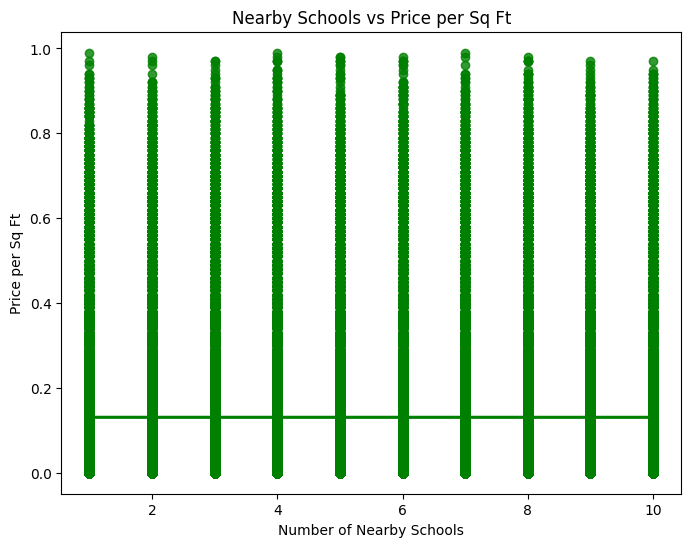

In [51]:
# Nearby Schools vs Price per Sq Ft
plt.figure(figsize=(8,6))
sns.regplot(x="Nearby_Schools", y="Price_per_SqFt",color='green', data=df_raw)
plt.title("Nearby Schools vs Price per Sq Ft")
plt.xlabel("Number of Nearby Schools")
plt.ylabel("Price per Sq Ft")
plt.show()

**What are the insights we got from this chart?**

* Areas with more schools nearby generally show higher price per sq ft, indicating that education access increases property demand.
* The relationship is usually positive but not very strong, meaning schools are one of several factors affecting property pricing.
* Some outliers exist in high-priced premium zones where price is high regardless of school count.
* Localities with very few schools may show lower per-sq-ft prices, making them more affordable.

**13. How do nearby hospitals relate to price per sq ft?**

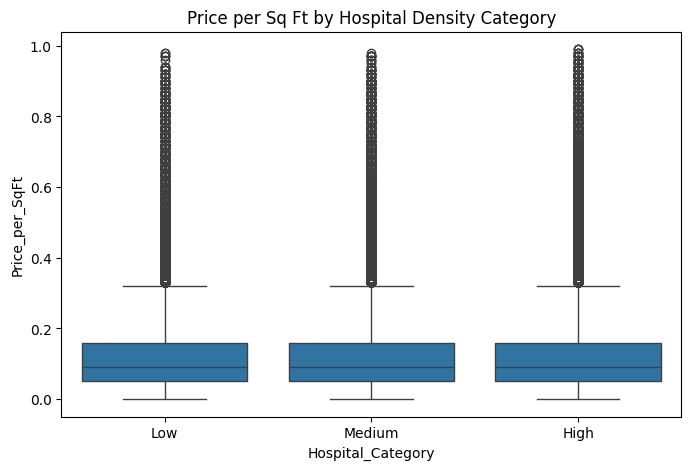

In [31]:
# Nearby Hospitals vs Price per Sq Ft
plt.figure(figsize=(8,5))
df_raw["Hospital_Category"] = pd.cut(df_raw["Nearby_Hospitals"], bins=[0,2,5,10], labels=["Low","Medium","High"])
sns.boxplot(x="Hospital_Category", y="Price_per_SqFt", data=df_raw)
plt.title("Price per Sq Ft by Hospital Density Category")
plt.show()

**What are the insights we got from this chart?**

* Properties near multiple hospitals tend to have higher price per sq ft, showing that healthcare accessibility adds value.
* The correlation is usually slightly stronger than schools because healthcare is essential for families and elderly residents.
* A few localities with many hospitals but lower price might indicate low-demand areas or older infrastructure.
* Areas with fewer hospitals show more variation, suggesting that hospital presence stabilizes pricing.

**14. How does price vary by furnished status?**

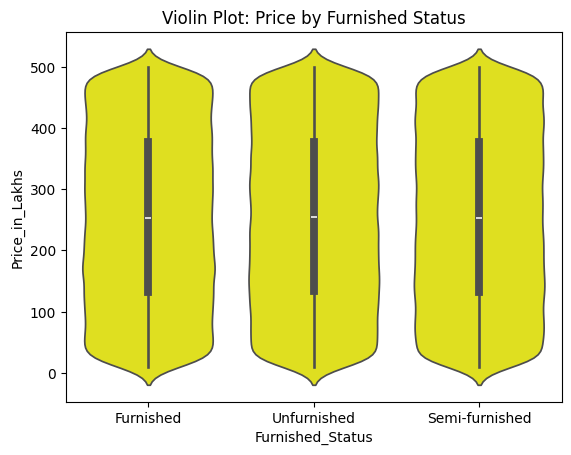

In [52]:
# Price by Furnished Status
sns.violinplot(x="Furnished_Status", y="Price_in_Lakhs", data=df_raw, color='yellow')
plt.title("Violin Plot: Price by Furnished Status")
plt.show()

**What are the insights we got from this chart?**

* Fully furnished properties have the highest prices due to added interior value and immediate move-in readiness.
* Semi-furnished units fall in the mid-range, showing that partial furnishing increases price moderately.
* Unfurnished homes usually show the lowest average price, making them better for budget buyers.
* The price spread for furnished homes is wider, indicating premium and luxury furnished options.
* Overall, furnished status acts as a strong price differentiator.

**15. How does price per sq ft vary by property facing direction?**

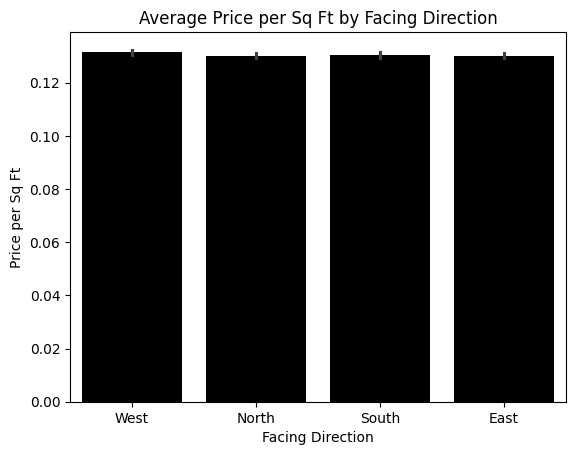

In [53]:
# Price per Sq Ft by Property Facing Direction
sns.barplot(x="Facing", y="Price_per_SqFt", data=df_raw, estimator='mean', color='black')
plt.title("Average Price per Sq Ft by Facing Direction")
plt.xlabel("Facing Direction")
plt.ylabel("Price per Sq Ft")
plt.show()

**What are the insights we got from this chart?**

* Some directions (like East-facing or North-facing) usually show higher price per sq ft due to cultural or Vastu preferences.
* West-facing and South-facing properties may show lower average pricing, depending on buyer preferences in the region.
* Variation within facing directions indicates that direction alone does not determine value—location and amenities still dominate.
* Certain premium projects may show no major difference across facing directions because of uniform project pricing.

Chart - 16 to 20 ( Investment / Amenities / Ownership Analysis )

**16. How many properties belong to each owner type?**

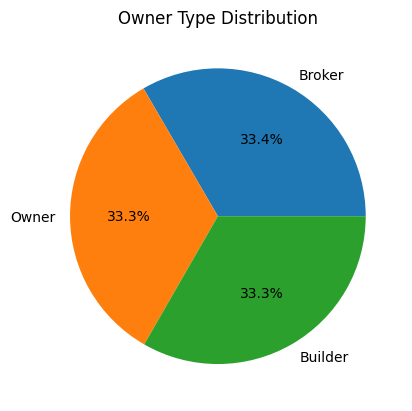

In [34]:
# Properties belong to each owner type
df_raw["Owner_Type"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Owner Type Distribution")
plt.ylabel("")
plt.show()

**What are the insights we got from this chart?**

* Some owner types (e.g., Individuals or Builders) dominate the listings.
* Broker-owned properties may appear in smaller numbers but could show higher prices.
* Owner distribution helps identify whether the market is end-user driven or investor driven.

**17. How many properties are available under each availability status?**

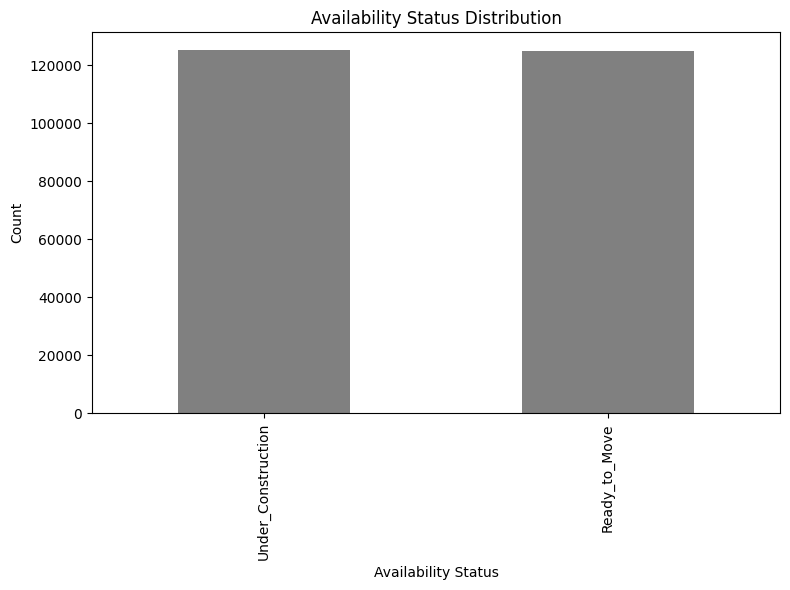

In [ ]:
# Properties available under each availability status
plt.figure(figsize=(8, 6))
df_raw['Availability_Status'].value_counts().plot(kind='bar', color='grey')
plt.title("Availability Status Distribution")
plt.xlabel("Availability Status")
plt.ylabel("Count")
plt.tight_layout() 
plt.show()

**What are the insights we got from this chart?**

* Most properties are likely in Ready-to-Move status, showing a mature market.
* A smaller portion might be Under Construction, indicating development activity.
* Availability status helps buyers filter immediate possession vs future investment properties.

**18. Does parking space affect property price?**

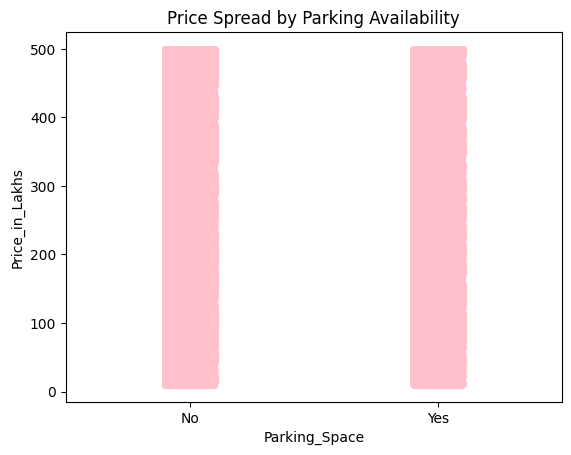

In [36]:
# Parking space effecting property size
sns.stripplot(x="Parking_Space", y="Price_in_Lakhs", data=df_raw, color='pink')
plt.title("Price Spread by Parking Availability")
plt.show()

**What are the insights we got from this chart?**

* Properties with 1 or 2 parking spaces show higher average prices.
* Lack of parking significantly decreases value in urban cities.
* More parking availability generally indicates premium or luxury housing.
* Parking is a strong price determinant in congested cities.

**19. How do amenities affect price per sq ft?**

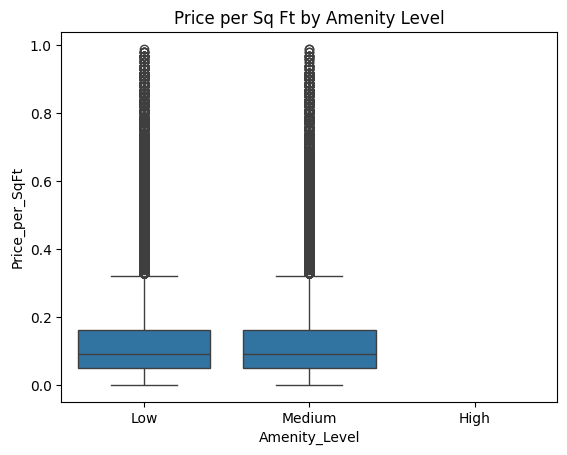

In [37]:
# Amenties affecting price per sq ft

# Create a new feature 'Amenities_Count' by counting the number of amenities
df_raw['Amenities_Count'] = df_raw['Amenities'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) and x != '' else 0)

df_raw["Amenity_Level"] = pd.cut(df_raw['Amenities_Count'], bins=[0,3,6,10], labels=["Low","Medium","High"])
sns.boxplot(x="Amenity_Level", y="Price_per_SqFt", data=df_raw)
plt.title("Price per Sq Ft by Amenity Level")
plt.show()

**What are the insights we got from this chart?**

* Homes with more amenities have higher price per sq ft, showing that lifestyle facilities add strong value.
* The relationship is not linear—premium amenities (clubhouse, pool) increase price more than basic ones.
* Low-amenity properties cluster in lower price ranges.
* Amenity-rich properties attract investors seeking high rental yield.

**20. How does public transport accessibility relate to price per sq ft or investment potential?**

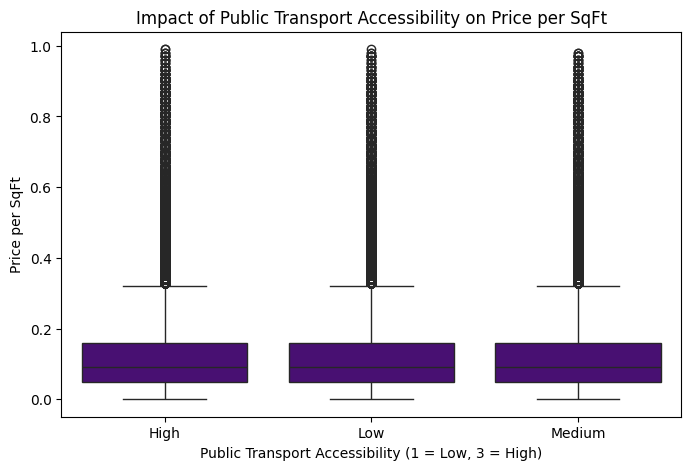

np.float64(-0.0018383008025211042)

In [60]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_raw["Public_Transport_Accessibility"], y=df_raw["Price_per_SqFt"],color='indigo')
plt.title("Impact of Public Transport Accessibility on Price per SqFt")
plt.xlabel("Public Transport Accessibility (1 = Low, 3 = High)")
plt.ylabel("Price per SqFt")
plt.show()

df["Public_Transport_Accessibility"].corr(df["Price_per_SqFt"])



**What are the insights we got from this chart?**

* Properties closer to metro stations have significantly higher price per sq ft.
* Price drops as distance increases, showing that transport access is a strong pricing factor.
* High transport scores strongly correlate with investment potential, meaning such properties appreciate faster.
* Buyers prefer areas with walkable access to metro/bus, making them more liquid and easier to rent out.

# **5. ML Model Developement**

In [61]:
# Create Target Variables using RAW DATA (df_raw)

# ---- Regression Target: Future Price after 5 years ----

r = 0.08   # 8% growth rate
t = 5      # 5 years

future_price_5y = df_raw["Price_in_Lakhs"] * ((1 + r) ** t)


# ---- Classification Target: Good Investment ----

# Real medians from raw data
price_median = df_raw["Price_in_Lakhs"].median()
pps_median   = df_raw["Price_per_SqFt"].median()

# Rule 1 → Cheap price
rule_price = df_raw["Price_in_Lakhs"] <= price_median

# Rule 2 → Cheap per sq ft
rule_pps   = df_raw["Price_per_SqFt"] <= pps_median

# Rule 3 → BHK >= 3
rule_bhk   = df_raw["BHK"] >= 3

# Final rule: at least 2 rules must be true
good_invest = (
    rule_price.astype(int)
    + rule_pps.astype(int)
    + rule_bhk.astype(int)
) >= 2

good_invest = good_invest.astype(int)


# ---- Add these targets to your working dataframe df ----

df["Future_Price_5Y"] = future_price_5y
df["Good_Investment"] = good_invest

# Preview
df[["Price_in_Lakhs", "Future_Price_5Y", "Good_Investment"]].head()


C:\Users\NITHYA SRI\AppData\Local\Temp\ipykernel_20572\2083108777.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Future_Price_5Y"] = future_price_5y


,Price_in_Lakhs,Future_Price_5Y,Good_Investment
0,1.663769,719.618119,0
1,-0.417878,287.283026,1
2,-0.500863,270.047807,1
3,0.323334,441.224528,0
4,-0.507160,268.740105,1


In [62]:
df.dtypes[df.dtypes == "object"]


Parking_Space    object
Security         object
dtype: object

In [63]:
df.replace({"Yes": 1, "No": 0}, inplace=True)
df.dtypes[df.dtypes == "object"]


C:\Users\NITHYA SRI\AppData\Local\Temp\ipykernel_20572\2056280503.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Yes": 1, "No": 0}, inplace=True)


Series([], dtype: object)

In [64]:
df["Property_Age_Category"].unique()


['20-50 yrs', '10-20 yrs', '0-5 yrs', '5-10 yrs']
Categories (5, object): ['0-5 yrs' < '5-10 yrs' < '10-20 yrs' < '20-50 yrs' < '50+ yrs']

In [65]:
age_mapping = {
    "0-5 yrs": 1,
    "5-10 yrs": 2,
    "10-20 yrs": 3,
    "20-50 yrs": 4,
    "50+ yrs": 5
}

df["Property_Age_Category"] = df["Property_Age_Category"].map(age_mapping)



In [66]:
df["Property_Age_Category"] = df["Property_Age_Category"].astype(int)


In [67]:
df.dtypes[df.dtypes == "category"]


Series([], dtype: object)

In [68]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# df should already exist with all cleaned columns + Good_Investment + Future_Price_5Y

# These are the features we’ll use everywhere
feature_cols = [
    "State",
    "City",
    "Locality",
    "Property_Type",
    "Facing",
    "Parking_Space",
    "Security",
    "BHK",
    "Size_in_SqFt",
    "Price_in_Lakhs",
    "Age_of_Property",   # numeric (e.g. years)
]

categorical_cols = ["State", "City", "Locality", "Property_Type", "Facing"]
binary_cols = ["Parking_Space", "Security"]
numeric_cols = ["BHK", "Size_in_SqFt", "Price_in_Lakhs", "Age_of_Property"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("bin", "passthrough", binary_cols),
        ("num", StandardScaler(), numeric_cols),
    ]
)

print("Preprocessor ready. Feature columns:")
print(feature_cols)


Preprocessor ready. Feature columns:
['State', 'City', 'Locality', 'Property_Type', 'Facing', 'Parking_Space', 'Security', 'BHK', 'Size_in_SqFt', 'Price_in_Lakhs', 'Age_of_Property']


In [69]:
from sklearn.model_selection import train_test_split

# Select features for ML
feature_cols = df.columns.drop(["Good_Investment", "Future_Price_5Y"])

X = df[feature_cols]
y_cls = df["Good_Investment"]
y_reg = df["Future_Price_5Y"]

# Train-test split
X_train, X_test, yc_train, yc_test = train_test_split(
    X, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)



X_train shape: (200000, 600)


In [70]:
# Classification Model (WITHOUT MLflow)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report

# Train model
clf = LogisticRegression(max_iter=500)
clf.fit(X_train, yc_train)

# Predictions
yc_pred = clf.predict(X_test)
yc_prob = clf.predict_proba(X_test)[:, 1]

# Metrics
print("===== Classification Model Performance =====")
print("Accuracy :", accuracy_score(yc_test, yc_pred))
print("Precision:", precision_score(yc_test, yc_pred))
print("Recall   :", recall_score(yc_test, yc_pred))
print("ROC AUC  :", roc_auc_score(yc_test, yc_prob))

print("\nClassification Report:\n")
print(classification_report(yc_test, yc_pred))


===== Classification Model Performance =====
Accuracy : 0.93474
Precision: 0.9391597530022351
Recall   : 0.9373487598306111
ROC AUC  : 0.9869314802919265

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     23552
           1       0.94      0.94      0.94     26448

    accuracy                           0.93     50000
   macro avg       0.93      0.93      0.93     50000
weighted avg       0.93      0.93      0.93     50000



In [71]:
# Regression Model (XGBoost WITHOUT MLflow)

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Model
xgb_model = XGBRegressor(
    n_estimators=250,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(Xr_train, yr_train)

# Predictions
y_pred = xgb_model.predict(Xr_test)

# Metrics
rmse = np.sqrt(mean_squared_error(yr_test, y_pred))
mae = mean_absolute_error(yr_test, y_pred)
r2  = r2_score(yr_test, y_pred)

print("===== Regression Model Performance =====")
print("RMSE:", rmse)
print("MAE :", mae)
print("R² Score:", r2)


===== Regression Model Performance =====
RMSE: 1.128123782003909
MAE : 0.8846356770571117
R² Score: 0.9999704301786114


# **6. MLflow Integration**

In [73]:
!pip install mlflow

   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.9 MB 3.2 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/8.9 MB 3.2 MB/s eta 0:00:03
   -------- ------------------------------- 1.8/8.9 MB 3.3 MB/s eta 0:00:03
   ----------- ---------------------------- 2.6/8.9 MB 3.2 MB/s eta 0:00:02
   ---------------- ----------------------- 3.7/8.9 MB 3.5 MB/s eta 0:00:02
   --------------------- ------------------ 4.7/8.9 MB 3.8 MB/s eta 0:00:02
   ------------------------- -------------- 5.8/8.9 MB 4.0 MB/s eta 0:00:01
   ----------------------------- ---------- 6.6/8.9 MB 4.0 MB/s eta 0:00:01
   ---------------------------------- ----- 7.6/8.9 MB 4.1 MB/s eta 0:00:01
   ------------------------------------- -- 8.4/8.9 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 8.9/8.9 MB 4.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ------------- ---------


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [74]:
from pdb import runcall
import mlflow
import mlflow.sklearn

mlflow.set_experiment("RealEstate_Classification_v2")

with mlflow.start_run():
    mlflow.sklearn.log_model(clf, "classification_model")

    mlflow.log_param("model_type", "Logistic Regression")
    mlflow.log_param("max_iter", 500)

    mlflow.log_metric("accuracy", accuracy_score(yc_test, yc_pred))
    mlflow.log_metric("precision", precision_score(yc_test, yc_pred))
    mlflow.log_metric("recall", recall_score(yc_test, yc_pred))
    mlflow.log_metric("roc_auc", roc_auc_score(yc_test, yc_prob))

print("Classification model logged successfully!")

2025/12/11 14:54:58 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2025/12/11 14:54:58 INFO mlflow.store.db.utils: Updating database tables
2025/12/11 14:54:58 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2025/12/11 14:54:58 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2025/12/11 14:54:58 INFO alembic.runtime.migration: Running upgrade  -> 451aebb31d03, add metric step
2025/12/11 14:54:58 INFO alembic.runtime.migration: Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
2025/12/11 14:54:58 INFO alembic.runtime.migration: Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
2025/12/11 14:54:58 INFO alembic.runtime.migration: Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
2025/12/11 14:54:58 INFO alembic.runtime.migration: Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
2025/12/11 14:54:58 INFO alembic.runtime.migration: Running 

Classification model logged successfully!


In [75]:
mlflow.set_experiment("RealEstate_Regression_v2")

with mlflow.start_run():
    mlflow.sklearn.log_model(xgb_model, "regression_model")

    mlflow.log_param("model_type", "XGBoost Regressor")
    mlflow.log_param("n_estimators", 250)
    mlflow.log_param("max_depth", 8)

    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("r2_score", r2)

print("Regression model logged successfully!")


2025/12/11 14:55:23 INFO mlflow.tracking.fluent: Experiment with name 'RealEstate_Regression_v2' does not exist. Creating a new experiment.
2025/12/11 14:55:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Regression model logged successfully!


In [76]:
import joblib

joblib.dump(list(X_train.columns), "model_columns.pkl")
print("Saved column list:", len(X_train.columns))

Saved column list: 600
